<a href="https://colab.research.google.com/github/Andre-Williams22/DS-2.2-Deep-Learning/blob/master/CourseWork/Libraries-for-neural-nets/Neural_Networks_Pybrain_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries for Neural Networks - Pybrain 2

In [1]:
!pip install https://github.com/pybrain/pybrain/archive/0.3.3.zip

     - 4.2MB 6.3MB/s
  Created wheel for PyBrain: filename=PyBrain-0.3.1-cp36-none-any.whl size=468232 sha256=e5c4433a138ddbed0e0364b3d4941a4d969609a55957d919810cb23ab66bbb3d
  Stored in directory: /tmp/pip-ephem-wheel-cache-dd41i0b7/wheels/0b/04/38/2f174aa3c578350870947ca6ab12e0eb89aef3478c9610eb0a
Successfully built PyBrain


In [3]:
import pybrain

In [4]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised import BackpropTrainer
from pybrain.structure.modules import SigmoidLayer

In [5]:
network = buildNetwork(2, 3, 1, outclass = SigmoidLayer, hiddenclass = SigmoidLayer, bias = False)

In [6]:
network

<FeedForwardNetwork 'FeedForwardNetwork-5'>

In [7]:
network['in']

<LinearLayer 'in'>

In [8]:
network['hidden0']

<SigmoidLayer 'hidden0'>

In [9]:
network['out']

<SigmoidLayer 'out'>

In [10]:
network['bias']

In [11]:
dataset = SupervisedDataSet(2, 1)
dataset.addSample((0,0), (0,))
dataset.addSample((0,1), (1,))
dataset.addSample((1,0), (1,))
dataset.addSample((1,1), (0,))

In [12]:
dataset['input']

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]])

In [13]:
dataset['target']

array([[0.],
       [1.],
       [1.],
       [0.]])

## Train Model 

In [14]:
# need to update the weights
optimizer = BackpropTrainer(module=network, dataset=dataset, learningrate=0.5)

In [15]:
epochs = 30000
error = []
for epoch in range(epochs):
  error_average = optimizer.train()
  if epoch % 1000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(error_average))
    error.append(error_average)

Epoch: 1 Error: 0.12904250660461672
Epoch: 1001 Error: 0.06867149671852292
Epoch: 2001 Error: 0.036697534238717244
Epoch: 3001 Error: 0.03372059040335695
Epoch: 4001 Error: 0.03281954324345732
Epoch: 5001 Error: 0.03239192867009836
Epoch: 6001 Error: 0.03214396647348187
Epoch: 7001 Error: 0.03198268720962037
Epoch: 8001 Error: 0.03186965218657181
Epoch: 9001 Error: 0.031786153714534096
Epoch: 10001 Error: 0.03172201822436114
Epoch: 11001 Error: 0.031671247720444565
Epoch: 12001 Error: 0.03163008109674502
Epoch: 13001 Error: 0.03159604253125007
Epoch: 14001 Error: 0.031567436751427515
Epoch: 15001 Error: 0.03154306459161187
Epoch: 16001 Error: 0.03152205425509115
Epoch: 17001 Error: 0.03150375696104672
Epoch: 18001 Error: 0.031487680074602085
Epoch: 19001 Error: 0.0314734428794725
Epoch: 20001 Error: 0.03146074656303941
Epoch: 21001 Error: 0.03144935335393487
Epoch: 22001 Error: 0.03143907171747504
Epoch: 23001 Error: 0.031429745644411554
Epoch: 24001 Error: 0.031421246793113415
Epoch: 

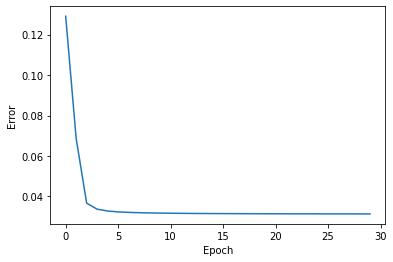

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.plot(error)

In [17]:
network.params

array([  2.08721464, -10.85992741, -10.87114488,   2.09298356,
        -5.83194106,  -5.51728853,   4.75683072,   4.77570888,
       -17.63741021])

## Perform Classifications

In [18]:
network.activate([0,0]) # expected is 0 

array([0.01708309])

In [19]:
network.activate([0,1]) # expect 1 

array([0.98494623])

In [20]:
network.activate([1,0]) # expect 1 

array([0.98493879])

In [21]:
network.activate([1,1])

array([0.50031616])